<a href="https://colab.research.google.com/github/amalvarezme/SenalesSistemas/blob/master/1_Se%C3%B1ales%20Continuas/PotenciaEncircutiosLC_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Repaso cálculo de potencia en circuitos capacitivos e inductivos





> Graficar la potencia media de una impedancia  $R+j\omega L$ , cuándo es excitada por una fuente sinusoidal.

> Graficar la potencia media de una impedancia  $R−j\frac{1}{\omega C}$ , cuándo es excitada por una fuente sinusoidal.



Para determinar la potencia media primero es necesario conocer la potencia instantánea $p(t)$, que en el caso de circuitos eléctricos es

$$
p(t) = v(t)i(t)
$$

De modo que nuestro primer objetivo es determinar la corriente y la tensión circulando por la impedancia en cuestión para determinar su potencia instantánea y, consecuentemente, su potencia media.

Existen dos maneras de trabajar con circuitos en corriente alterna: usando funciones sinusoidales o mediante un tratamiento fasorial. En este cuaderno se usarán ambos, comenzando por las funciones sinusoidales.

# Ondas sinusoidales

Se comienza suponiendo una de las dos cantidades (ya sea la tensión o la corriente) como una función sinusoidal (seno o coseno). Para este caso se supondrán la corriente y la tensión de la siguiente forma:

$$
i(t) = I_{max}\sin(\omega t) 
$$
$$
v(t) = V_{max}\sin(\omega t + \theta)
$$

En donde $\omega$ hace referencia a la misma frecuencia angular que aparece en $R+j\omega L$

La impedancia con la que se quiere trabajar puede verse como un circuito serie RL.

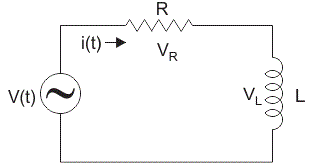

Las ecuaciones de cada elemento son:

$$v_R(t) = R i(t)$$
$$v_L(t) = L\frac{d}{dt}i(t)$$

De modo que

$$
v_R(t) = R I_{max}\sin(\omega t)
$$
$$
v_L(t) = L \frac{d}{dt}\bigg(I_{max}\sin(\omega t)\bigg) = \omega L I_{max}\cos(\omega t)
$$

Por leyes de Kirchhoff sabemos que

$$
v(t) = v_R(t) + v_L(t)\\
v(t) = R I_{max}\sin(\omega t) + \omega L I_{max}\cos(\omega t)
$$

Desde un inicio se había dicho que $v(t) = V_{max}\sin(\omega t + \theta)$, así que comparando ambas expresiones se puede determinar los valores de $V_{max}$ y $\theta$

$$
V_{max}\sin(\omega t + \theta) = R I_{max}\sin(\omega t) + \omega L I_{max}\cos(\omega t)\\
V_{max}\big(\sin(\omega t)\cos(\theta)+\sin(\theta)\cos(\omega t)\big) = R I_{max}\sin(\omega t) + \omega L I_{max}\cos(\omega t) 
$$

Comparando los términos se pueden establecer las siguientes igualdades:

$$
V_{max}\cos(\theta) = RI_{max}\\
V_{max}\sin(\theta) = \omega L I_{max}
$$

Dividiendo la segunda entre la primera se puede llegar al valor de $\theta$

$$
\theta = \arctan\bigg(\frac{\omega L}{R}\bigg)
$$

Usando la identidad trigonométrica pitagórica se obtiene el valor para $V_{max}$

$$
V_{max} = \sqrt{R^2 + (\omega L)^2} I_{max}
$$

Ahora podemos determinar la tensión a partir de la corriente para un circuito serie RL

Supongamos que para el circuito serie RL, tenemos

$$L = 0.01 H\\R = 4 \Omega\\i(t) = 2\sin(300t)$$

Determinemos su potencia media a lo largo de un periodo, recordando que la potencia media se define como

$$
P = \frac{1}{T_0} \int_0^{T_0} p(t)~dt
$$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

w = 300
L = 0.01
R = 4
Imax = 2
T0 = 2*np.pi/w
N = 100 #número de muestras

t = np.linspace(0, T0, N)
i = Imax*np.sin(w*t)

In [ ]:
Vmax = np.sqrt(np.square(R)+np.square(w*L))*Imax
theta = np.arctan(w*L/R)

v = Vmax*np.sin(w*t + theta)

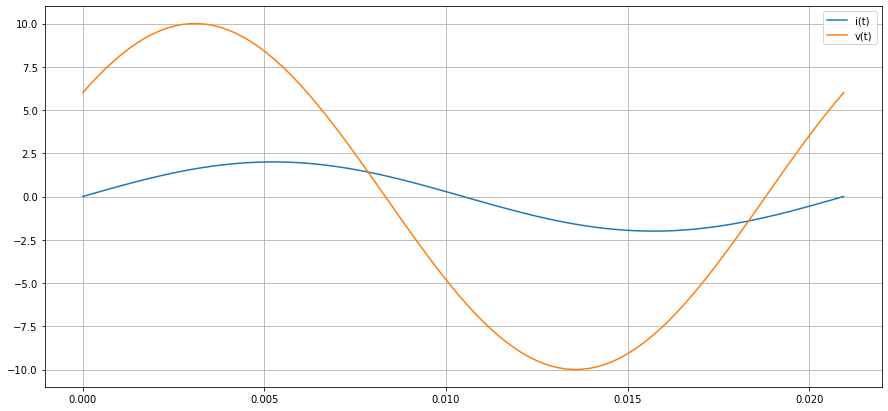

In [ ]:
#plotear la corriente y la
plt.figure(figsize=[15,7])
plt.plot(t, i, label = "i(t)")
plt.plot(t, v, label = "v(t)")
plt.grid()
plt.legend()

In [ ]:
p = v*i #potencia instantanea
P = np.trapz(p, t)/T0 #Potencia media
print("Potencia media: "+str(P))

Potencia media: 8.000000000000002


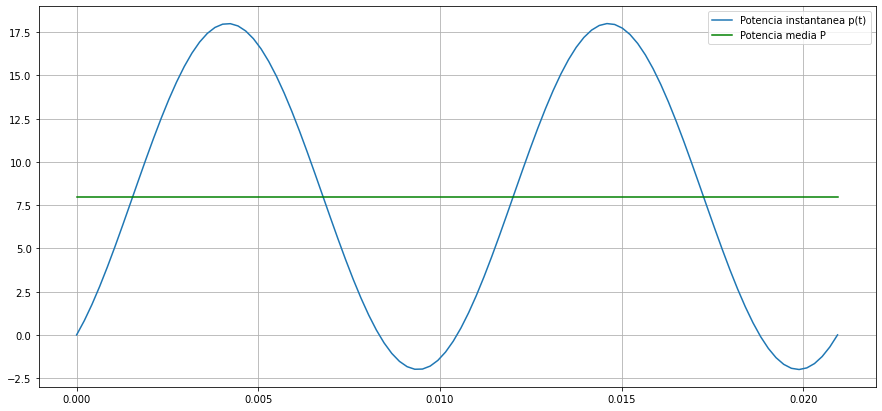

In [ ]:
#Plotear la potencia instantanea vs la potencia media
plt.figure(figsize=[15,7])
plt.plot(t, p, label = "Potencia instantanea p(t)")
plt.plot(t, P*np.ones(len(t)), "g", label = "Potencia media P")
plt.grid()
plt.legend()

Ahora observemos el circuito RC, cuya impedancia es $R - j\frac{1}{\omega C}$. Dado que la resistencia permanece igual, solo tenemos que determinar la tensión en el condensador.

$$
v_C = \frac{1}{C}\int_{-\infty}^{t}i(\tau)d\tau\\
v_C = \frac{1}{C}\int_{-\infty}^{t}I_{max}\sin(\omega \tau)d\tau\\
v_C = \frac{-I_{max}}{\omega C}\cos(\omega t)
$$

Se ve que la expresión es muy similar para el caso de un inductor, por lo que podemos utilizar todos los resultados anteriores haciendo el cambio $\omega L \rightarrow \frac{-1}{\omega C}$

Al aplicar este cambio de variables, se obtienen los siguientes resultados:

$$
\theta = \arctan\bigg(\frac{\omega L}{R}\bigg)\Bigg|_{\omega L \rightarrow\frac{-1}{\omega C}}\\
\theta = -\arctan\bigg(\frac{1}{\omega RC}\bigg)\\
V_{max} = \sqrt{R^2 + (\omega L)^2} I_{max}\Bigg|_{\omega L \rightarrow\frac{-1}{\omega C}}\\
V_{max} = \sqrt{R^2 + \bigg(\frac{1}{\omega C}\bigg)^2} I_{max}
$$

Ahora ya podemos determinar la tensión presente en la impedancia RC a partir de su corriente

Supongamos que para el circuito RC tenemos
$$
R = 4\Omega\\
C = 0.01 F\\
i(t) = 2\sin(300t)
$$

In [ ]:
C = 0.01
Vmax = np.sqrt(np.square(R)+np.square(1/(w*L)))*Imax
theta = -np.arctan(1/(w*R*C))

v = Vmax*np.sin(w*t + theta)

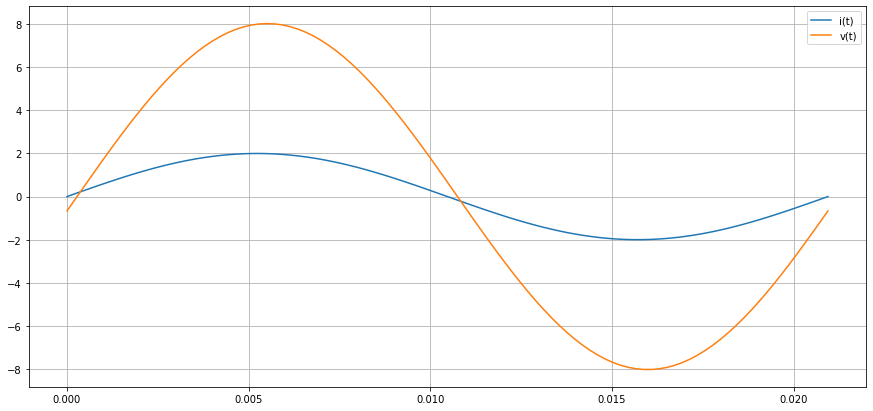

In [ ]:
plt.figure(figsize=[15,7])
plt.plot(t, i, label = "i(t)")
plt.plot(t, v, label = "v(t)")
plt.grid()
plt.legend()

In [ ]:
p = v*i #potencia instantanea
P = np.trapz(p, t)/T0 #Potencia media
print("Potencia media: "+str(P))

Potencia media: 7.999999999999999


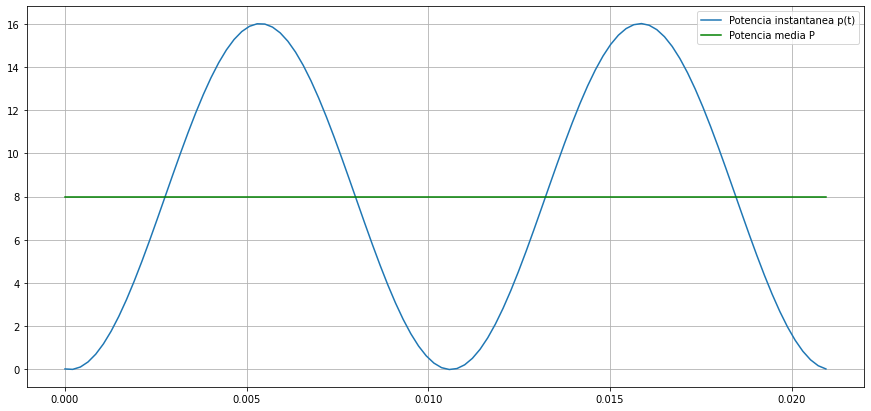

In [ ]:
plt.figure(figsize=[15,7])
plt.plot(t, p, label = "Potencia instantanea p(t)")
plt.plot(t, P*np.ones(len(t)), "g", label = "Potencia media P")
plt.grid()
plt.legend()